### **활성함수 activation function**

#### **비선형 함수 Relu(렐루: rectified linear unit, ReLU)**
#### **tanh(하이퍼 볼릭 탄젠트: hyperbolic tangent)**
* ReLU 함수는 0 이하를 잘라버림
* tanh 함수는 낮은 입력값에 대해 -1로 수렴, 큰 입력값에 대해 +1로 수렴
* sigmoid 함수는 낮은 입력값에 대해 0에 수렴, 큰 입력값에 대해 1로 수렴

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
line = np.linspace(-3,3,100)
tanh_line = np.tanh(line)
relu_line = np.maximum(line, 0)   # 두 개의 배열값 중 최대값 찾기
sig_line = 1/(1+np.exp(-line))

step_line = line.copy()
step_line[step_line <= 0] = 0
step_line[step_line > 0] = 1

In [0]:
# 음수 표시
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 표시
#from matplotlib import font_manager, rc
#font_loc = 'C:/Windows/Fonts/HANDotum.ttf'
#font_name = font_manager.FontProperties(fname=font_loc).get_name()
#matplotlib.rc('font', family=font_name)

In [0]:
import matplotlib.pylab as plt
plt.rcParams['figure.figsize'] = (14,10)

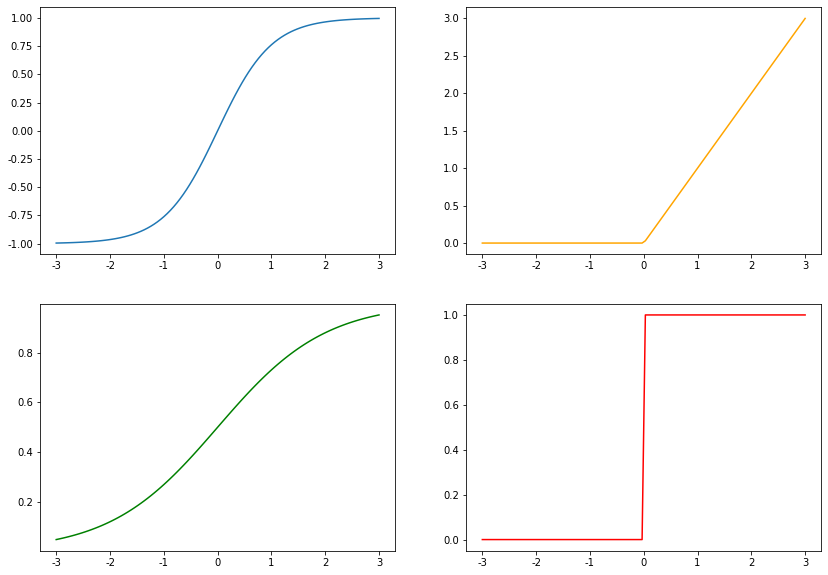

In [5]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
ax1.plot(line, tanh_line, label='tanh')
ax2.plot(line, relu_line, label='relu', color='orange')
ax3.plot(line, sig_line, label='sigmoid', color='green')
ax4.plot(line, step_line, label='step', color='red')

Text(0, 0.5, 'relu(x), tanh(x)')

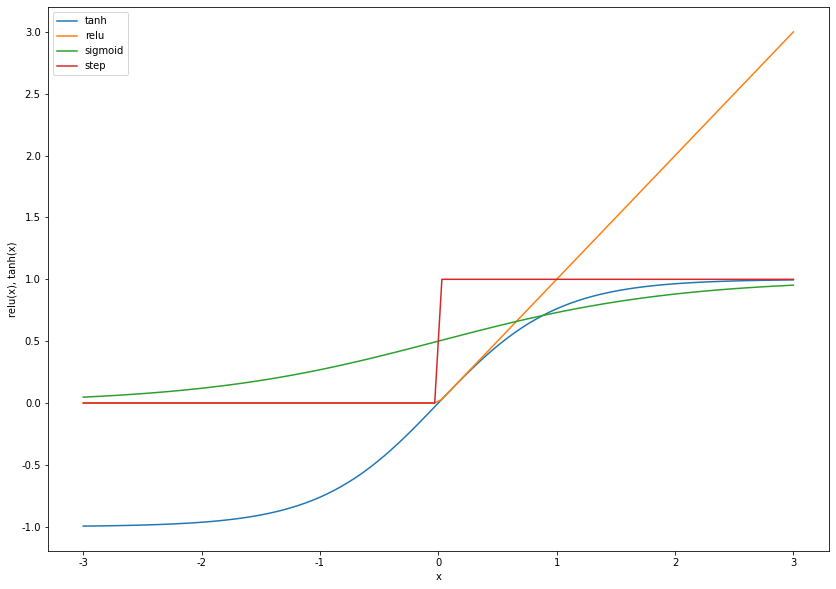

In [6]:
plt.plot(line, tanh_line, label = 'tanh')
plt.plot(line, relu_line, label = 'relu')
plt.plot(line, sig_line, label = 'sigmoid')
plt.plot(line, step_line, label = 'step')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')

#### **보통 분류 모델의 경우 맨 마지막 출력층에 sigmoid나 softmax 함수를 적용**
* 이항분류 : 시그모이드(sigmoid) 한개 0.5
* 다항분류 : 소프트맥스(softmax)

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [0]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

### **신경망 모델**
MLP(다층 퍼셉트론) 구현인 MLPClassifier를 적용

In [12]:
! pip install mglearn

     |████████████████████████████████| 542kB 3.3MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.8-py2.py3-none-any.whl size=582647 sha256=c9b5e01a3be4442500a1b9021dcc65c0967b1d63323b3dc22036993d23401a8f
  Stored in directory: /root/.cache/pip/wheels/47/b8/58/ce0c4be41f4efbfb8773eb72782164dbb758685d12ef2732f5
Successfully built mglearn


In [13]:
import mglearn

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


### **은닉 유닛이 100개인 신경망으로 학습시킨 two_moons 데이터셋의 결정경계**

In [10]:
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mlp

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Text(0, 0.5, '특성 1')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


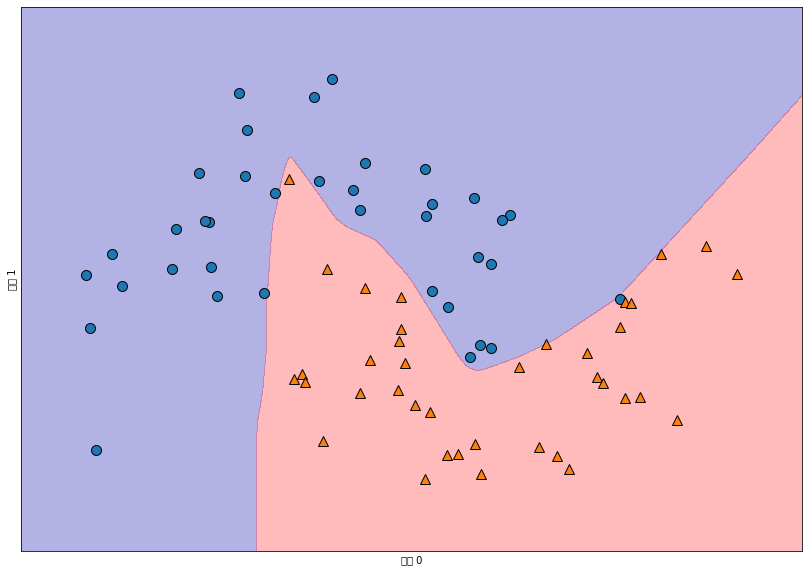

In [14]:
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

* 약간 결정경계 부분이 조금 더 날카로워짐
* 은닉층이 하나이므로 결정경계를 만드는 함수는 직선 10개가 합쳐져서 구성됨
* 더 매끄러운 결정경계를 원한다면 은닉유닛 추가, 은닉층 추가 또는 tanh 함수 사용

### **은닉 유닛이 10개인 신경망으로 학습시킨 two_moons 데이터셋의 결정경계**

In [19]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10]).fit(X_train, y_train)
mlp

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[10], learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Text(0, 0.5, '특성 1')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


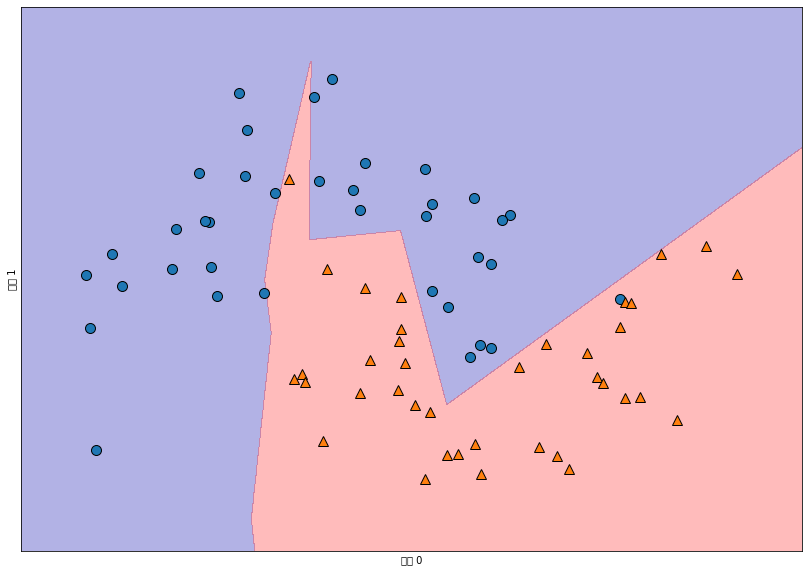

In [20]:
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

* 약간 결정경계 부분이 조금 더 날카로워짐
* 은닉층이 하나이므로 결정경계를 만드는 함수는 직선 10개가 합쳐져서 구성됨
* 더 매끄러운 결정경계를 원한다면 은닉유닛 추가, 은닉층 추가 또는 tanh 함수 사용

### **10개의 유닛으로 된 두 개의 은닉층**

Text(0, 0.5, '특성 1')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


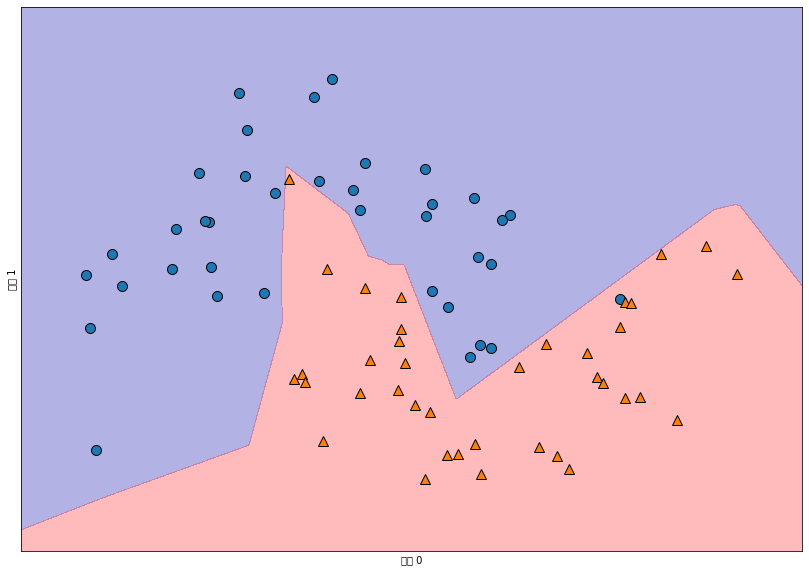

In [17]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10,10]).fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

### **tanh함수 적용, 10개의 유닛, 두 개의 은닉층**

Text(0, 0.5, '특성 1')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


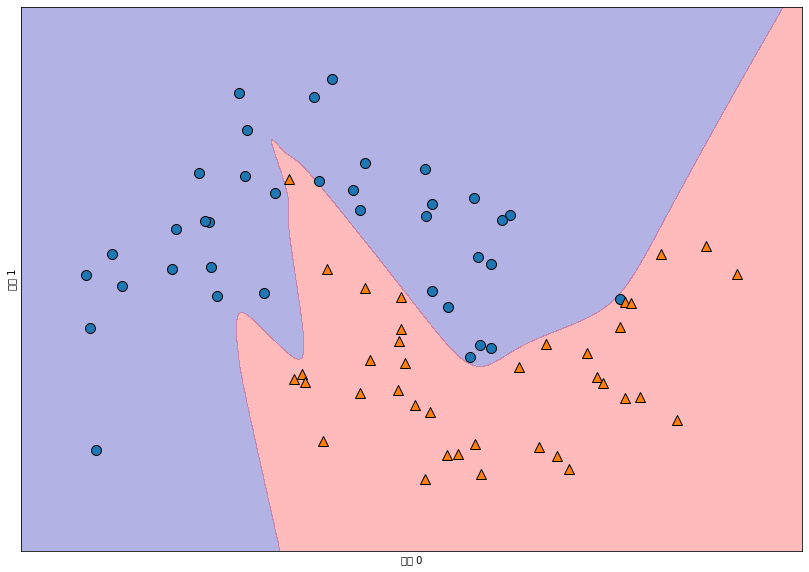

In [18]:
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10,10]).fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('특성 0')
plt.ylabel('특성 1')